In [1]:
# Import libraries. You may or may not use all of these.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf

from tensorflow.keras.models import Sequential #type: ignore
from tensorflow.keras.layers import Dense #type: ignore
from tensorflow.keras.optimizers import Adam #type: ignore
from tensorflow.keras.losses import MeanAbsoluteError #type: ignore
from tensorflow.keras.callbacks import Callback #type: ignore

# import tensorflow_docs as tfdocs #type: ignore
# import tensorflow_docs.plots #type: ignore
# import tensorflow_docs.modeling #type: ignore

2024-12-12 18:04:26.605666: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734026666.620468   61095 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734026666.625093   61095 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-12 18:04:26.641052: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Import data
dataset = pd.read_csv('insurance.csv')
dataset.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:
dataset['sex_code'] = dataset['sex'].astype('category').cat.codes
dataset['smoker_code'] = dataset['smoker'].astype('category').cat.codes
dataset['region_code'] = dataset['region'].astype('category').cat.codes
dataset.head()

,age,sex,bmi,children,smoker,region,expenses,sex_code,smoker_code,region_code
0,19,female,27.9,0,yes,southwest,16884.92,0,1,3
1,18,male,33.8,1,no,southeast,1725.55,1,0,2
2,28,male,33.0,3,no,southeast,4449.46,1,0,2
3,33,male,22.7,0,no,northwest,21984.47,1,0,1
4,32,male,28.9,0,no,northwest,3866.86,1,0,1


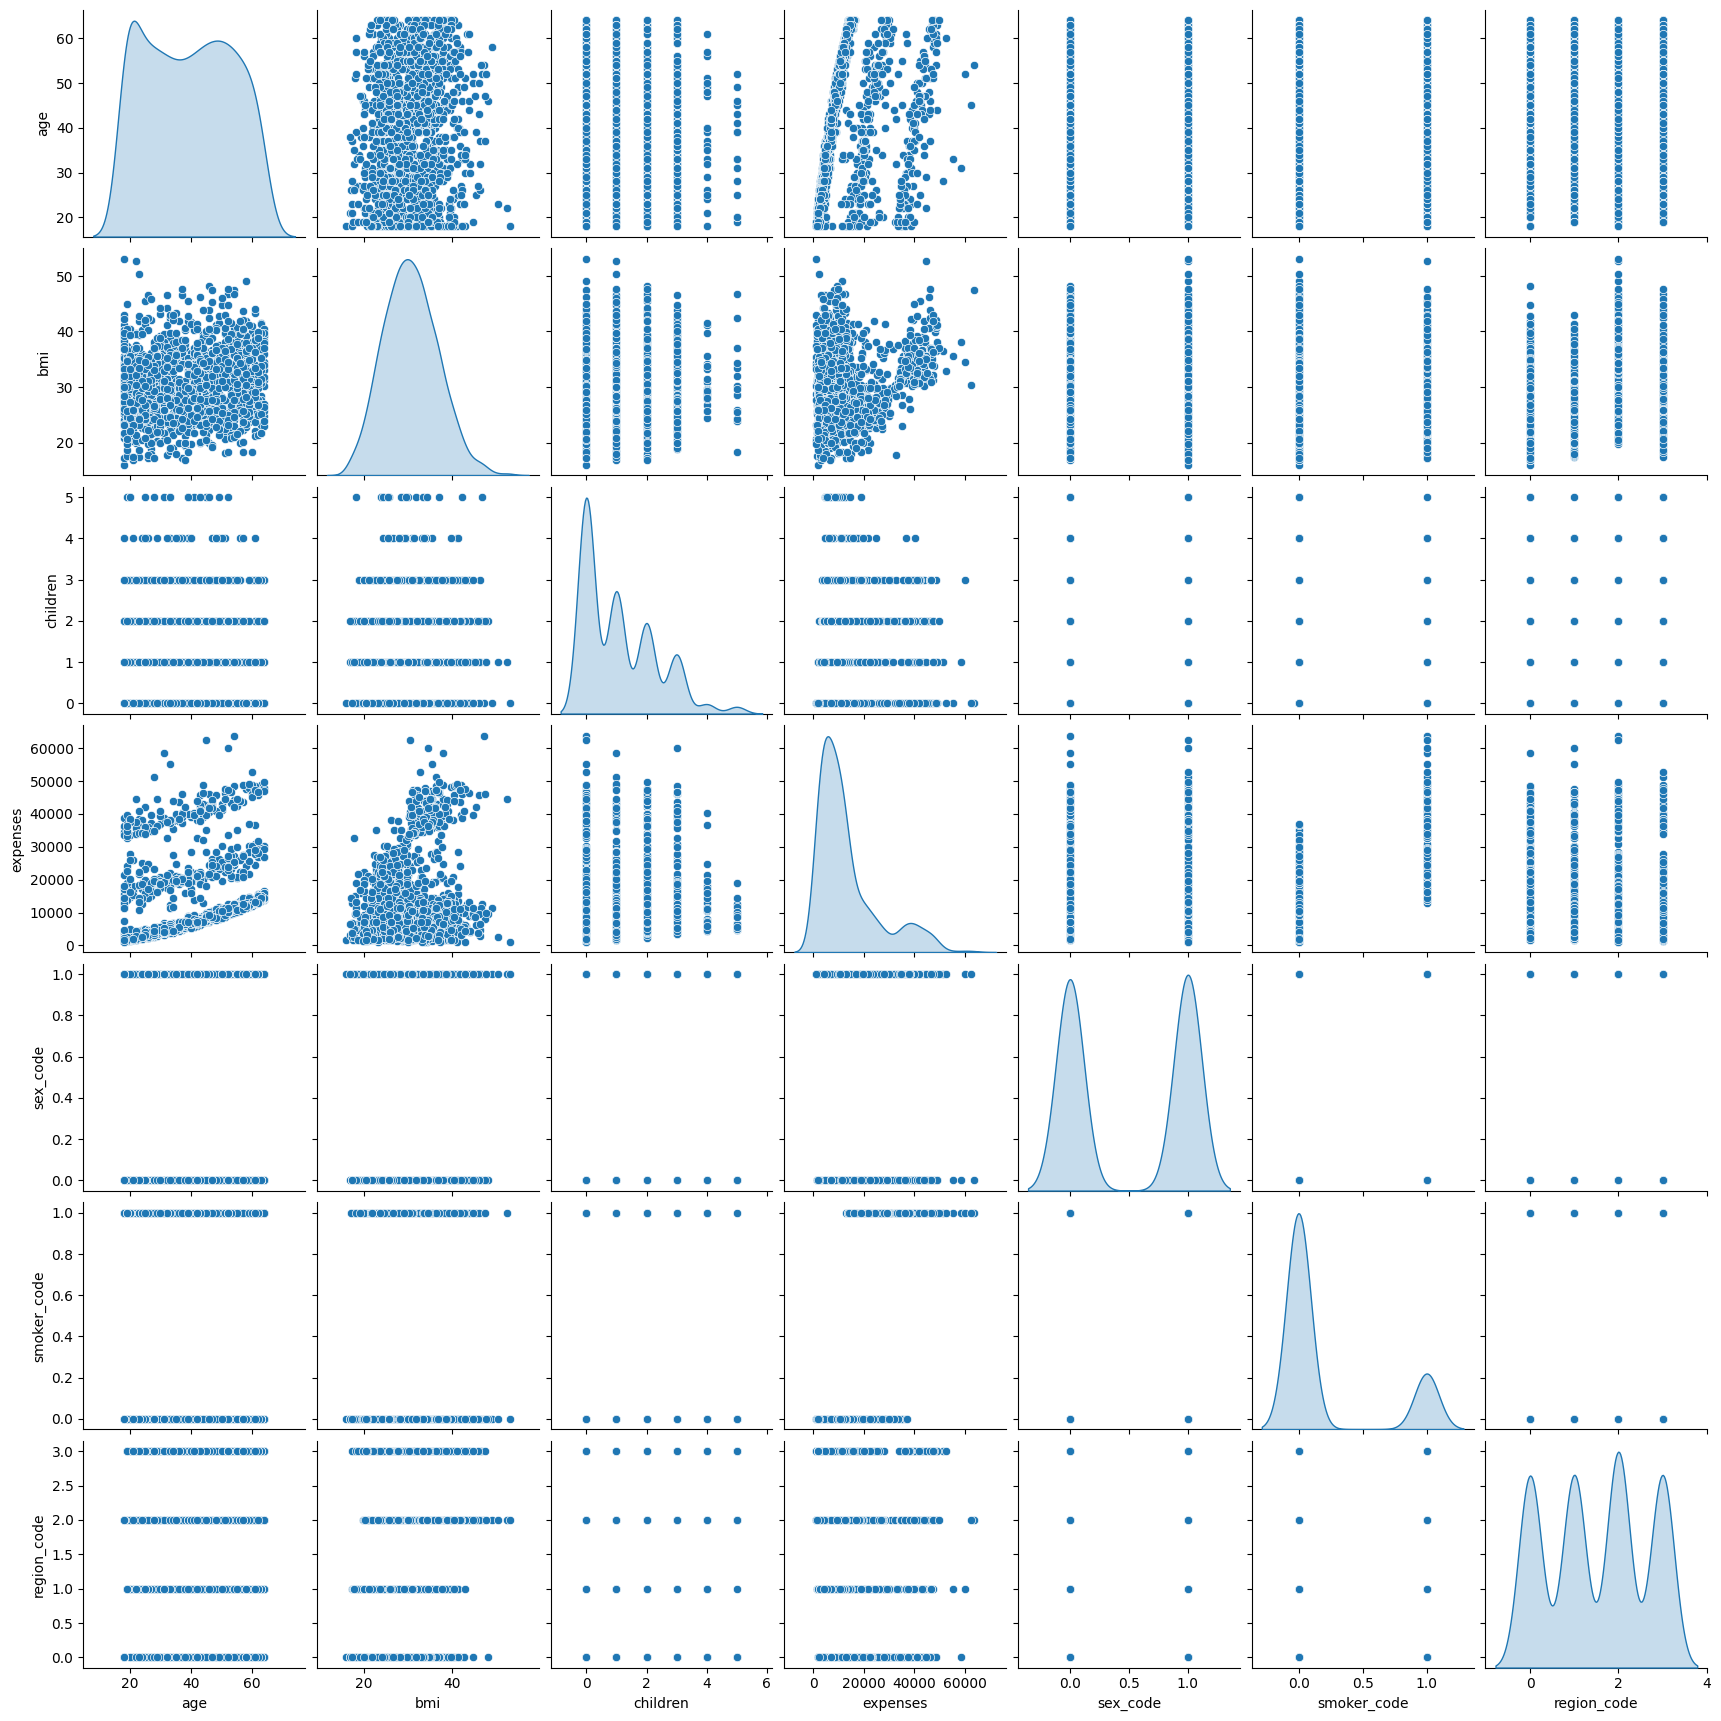

In [4]:
sns.pairplot(dataset, diag_kind = 'kde')
plt.show()

In [5]:
X = dataset[['age', 'bmi', 'children', 'sex_code', 'smoker_code', 'region_code']]
y = dataset['expenses']
train_dataset, test_dataset, train_labels, test_labels = train_test_split(X, y, test_size = 0.2)

In [17]:
class CustomLearningRateScheduler(Callback):
    def __init__(self, patience, factor, min_lr):
        super(CustomLearningRateScheduler, self).__init__()
        self.patience = patience
        self.factor = factor
        self.min_lr = min_lr
        self.wait = 0  
        self.best_val_loss = float('inf')

    def on_epoch_end(self, epoch, logs = None):
        logs = logs or {}
        val_loss = logs.get('loss')
        if val_loss is not None:
            if val_loss < self.best_val_loss:
                self.best_val_loss = val_loss
                self.wait = 0
            else:
                self.wait += 1
                if self.wait >= self.patience:
                    current_lr = float(self.model.optimizer.learning_rate)
                    new_lr = max(current_lr * self.factor, self.min_lr)
                    if current_lr > self.min_lr:
                        print(f"\nEpoch {epoch + 1}: Reducing learning rate from {current_lr:.4f} to {new_lr:.4f}")
                        self.model.optimizer.learning_rate.assign(new_lr)
                    else:
                        print(f"\nEpoch {epoch + 1}: Reducing learning rate from {current_lr:.4f} to {self.min_lr}")
                        self.model.optimizer.learning_rate.assign(self.min_lr)
                    self.wait = 0
                
learning_rate_scheduler = CustomLearningRateScheduler(2, 0.9, 0.0001)

In [18]:
model = Sequential([Dense(units = 128),
                    Dense(units = 64),
                    Dense(units = 16),
                    Dense(units = 1)])
model.compile(optimizer = Adam(learning_rate = 0.002), loss = MeanAbsoluteError(), metrics = ['mae', 'mse'])
model.fit(train_dataset, train_labels, epochs = 200, callbacks = [learning_rate_scheduler])


Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 13133.6816 - mae: 13133.6816 - mse: 319979072.0000
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9156.3711 - mae: 9156.3711 - mse: 212227472.0000   
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7072.4502 - mae: 7072.4502 - mse: 145432624.0000 
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6911.2705 - mae: 6911.2705 - mse: 144816432.0000
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7225.1172 - mae: 7225.1172 - mse: 155423600.0000 
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6412.5796 - mae: 6412.5796 - mse: 140009840.0000
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6526.1323 - mae: 6526.1323 - mse: 150446800.0000 
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6684.7651 - mae: 6684.7651 - mse: 166736784.0000 
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6387.9487 - mae: 6387.9487 - mse: 155255328.0000 
Epoch 10/200
34/3

9/9 - 0s - 49ms/step - loss: 3462.5796 - mae: 3462.5796 - mse: 48519668.0000
Testing set Mean Abs Error: 3462.58 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


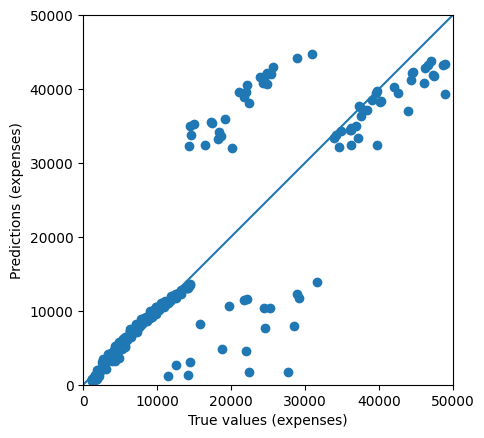

In [19]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
